## TASK 9: Библиотека Seaborn

Итак, в предыдущих упражнениях мы иногда не брали в расчет лабораторное задание project1. В рамках него был соревновательный проект. Оно имело более длительные сроки сдачи и гораздо больше коммитов, чем обычное лабораторное задание. 

Проанализируем динамику коммитов в этом проекте на одного пользователя. На этот раз мы будем использовать другую библиотеку для визуализации данных в Python — Seaborn. Эта библиотека упрощает создание стильных графиков.

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import numpy as np

In [2]:
##  если в коллабе

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data = sqlite3.connect("../data/checking-logs.sqlite")

In [4]:
df = pd.io.sql.read_sql('''
SELECT uid, timestamp, COUNT(*) as numTrials
FROM     
    (SELECT uid, DATE(timestamp) as timestamp
    FROM checker
    WHERE uid LIKE "user%" AND status = 'ready' AND labname = 'project1')
GROUP BY uid, timestamp
ORDER BY uid, timestamp
''',
data,
parse_dates= ['timestamp']
)

df

,uid,timestamp,numTrials
0,user_1,2020-05-14,11
1,user_10,2020-05-12,7
2,user_10,2020-05-13,14
3,user_10,2020-05-14,37
4,user_11,2020-05-03,1
...,...,...,...
89,user_4,2020-05-13,12
90,user_4,2020-05-14,27
91,user_6,2020-05-13,1
92,user_6,2020-05-14,1


In [5]:
df = df.pivot(index='uid', columns='timestamp', values='numTrials')\
                .fillna(0)
df

timestamp,2020-04-17,2020-04-18,2020-04-19,2020-04-22,2020-04-23,2020-04-24,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15
uid,,,,,,,,,,,,,,,,,,,
user_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
user_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,37.0,0.0
user_11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
user_13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,28.0,0.0,2.0,0.0
user_14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.0,7.0,24.0,43.0,0.0,7.0,0.0
user_15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
user_16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0
user_17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0


In [6]:
df = df.cumsum('columns')

In [7]:
df = df.melt(value_name='numTrials', ignore_index=False)
df.reset_index(inplace=True)

In [8]:
df.loc[len(df)] = ['user_4', '2020-04-17', 0]
df['timestamp'] = pd.to_datetime(df['timestamp'])

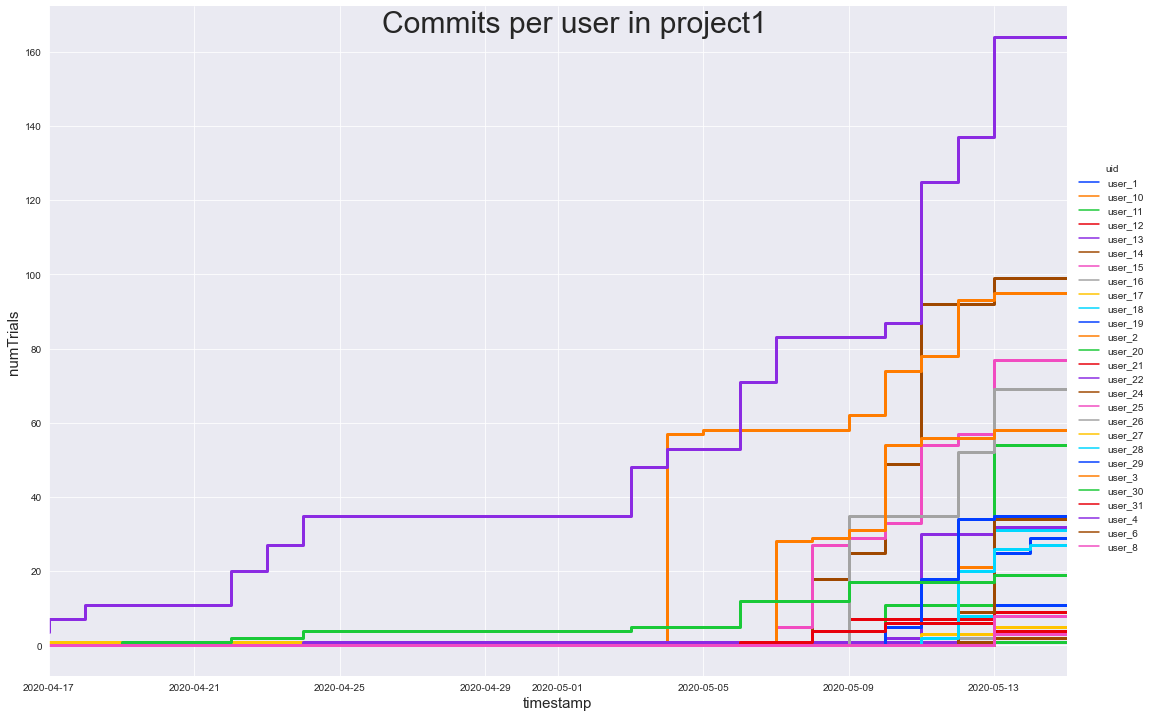

In [9]:
sns.set_style("darkgrid")

grf = sns.relplot(data=df,
            x='timestamp',
            y='numTrials',
            kind='line',
            hue='uid',
            linewidth=3, 
            palette='bright',
            height=10,
            aspect=1.5,
            ci=None,
            drawstyle='steps'
            )

grf.set(xlim= (df['timestamp'].min(), df['timestamp'].max()))
plt.suptitle('Commits per user in project1', size=30)
plt.xlabel('timestamp', size=15)
plt.ylabel('numTrials', size=15)
plt.yticks(np.arange(0, max(df['numTrials']), 20))
plt.show()

«Какой пользователь имел самое большое количество коммитов на протяжении почти всего времени?». 

Ответ: **user_4**

«Какой пользователь был лидером по количеству коммитов, но в течение очень ограниченного периода времени?»

Ответ: **user_2**

In [10]:
data.close()